## Step 1: Installing necessary libraries


In [1]:
!pip install scikit-learn pandas matplotlib seaborn streamlit --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, silhouette_score
from sklearn.cluster import KMeans, DBSCAN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.9 MB/s eta 0:00:00


## Step 2: Data Cleaning and Preprocessing

In [3]:
# Upload your CSV dataset using the file browser or code below
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('vocal_gender_features_new.csv')
df.head()


Saving vocal_gender_features_new.csv to vocal_gender_features_new (1).csv


,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0


In [4]:
# Check for missing values
print(df.isnull().sum())

# Drop rows or fill missing values
df = df.dropna()  # or use df.fillna(df.mean())

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Dimensionality reduction
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


mean_spectral_centroid     0
std_spectral_centroid      0
mean_spectral_bandwidth    0
std_spectral_bandwidth     0
mean_spectral_contrast     0
mean_spectral_flatness     0
mean_spectral_rolloff      0
zero_crossing_rate         0
rms_energy                 0
mean_pitch                 0
min_pitch                  0
max_pitch                  0
std_pitch                  0
spectral_skew              0
spectral_kurtosis          0
energy_entropy             0
log_energy                 0
mfcc_1_mean                0
mfcc_1_std                 0
mfcc_2_mean                0
mfcc_2_std                 0
mfcc_3_mean                0
mfcc_3_std                 0
mfcc_4_mean                0
mfcc_4_std                 0
mfcc_5_mean                0
mfcc_5_std                 0
mfcc_6_mean                0
mfcc_6_std                 0
mfcc_7_mean                0
mfcc_7_std                 0
mfcc_8_mean                0
mfcc_8_std                 0
mfcc_9_mean                0
mfcc_9_std    

## Step 3: Exploratory Data Analysis (EDA)

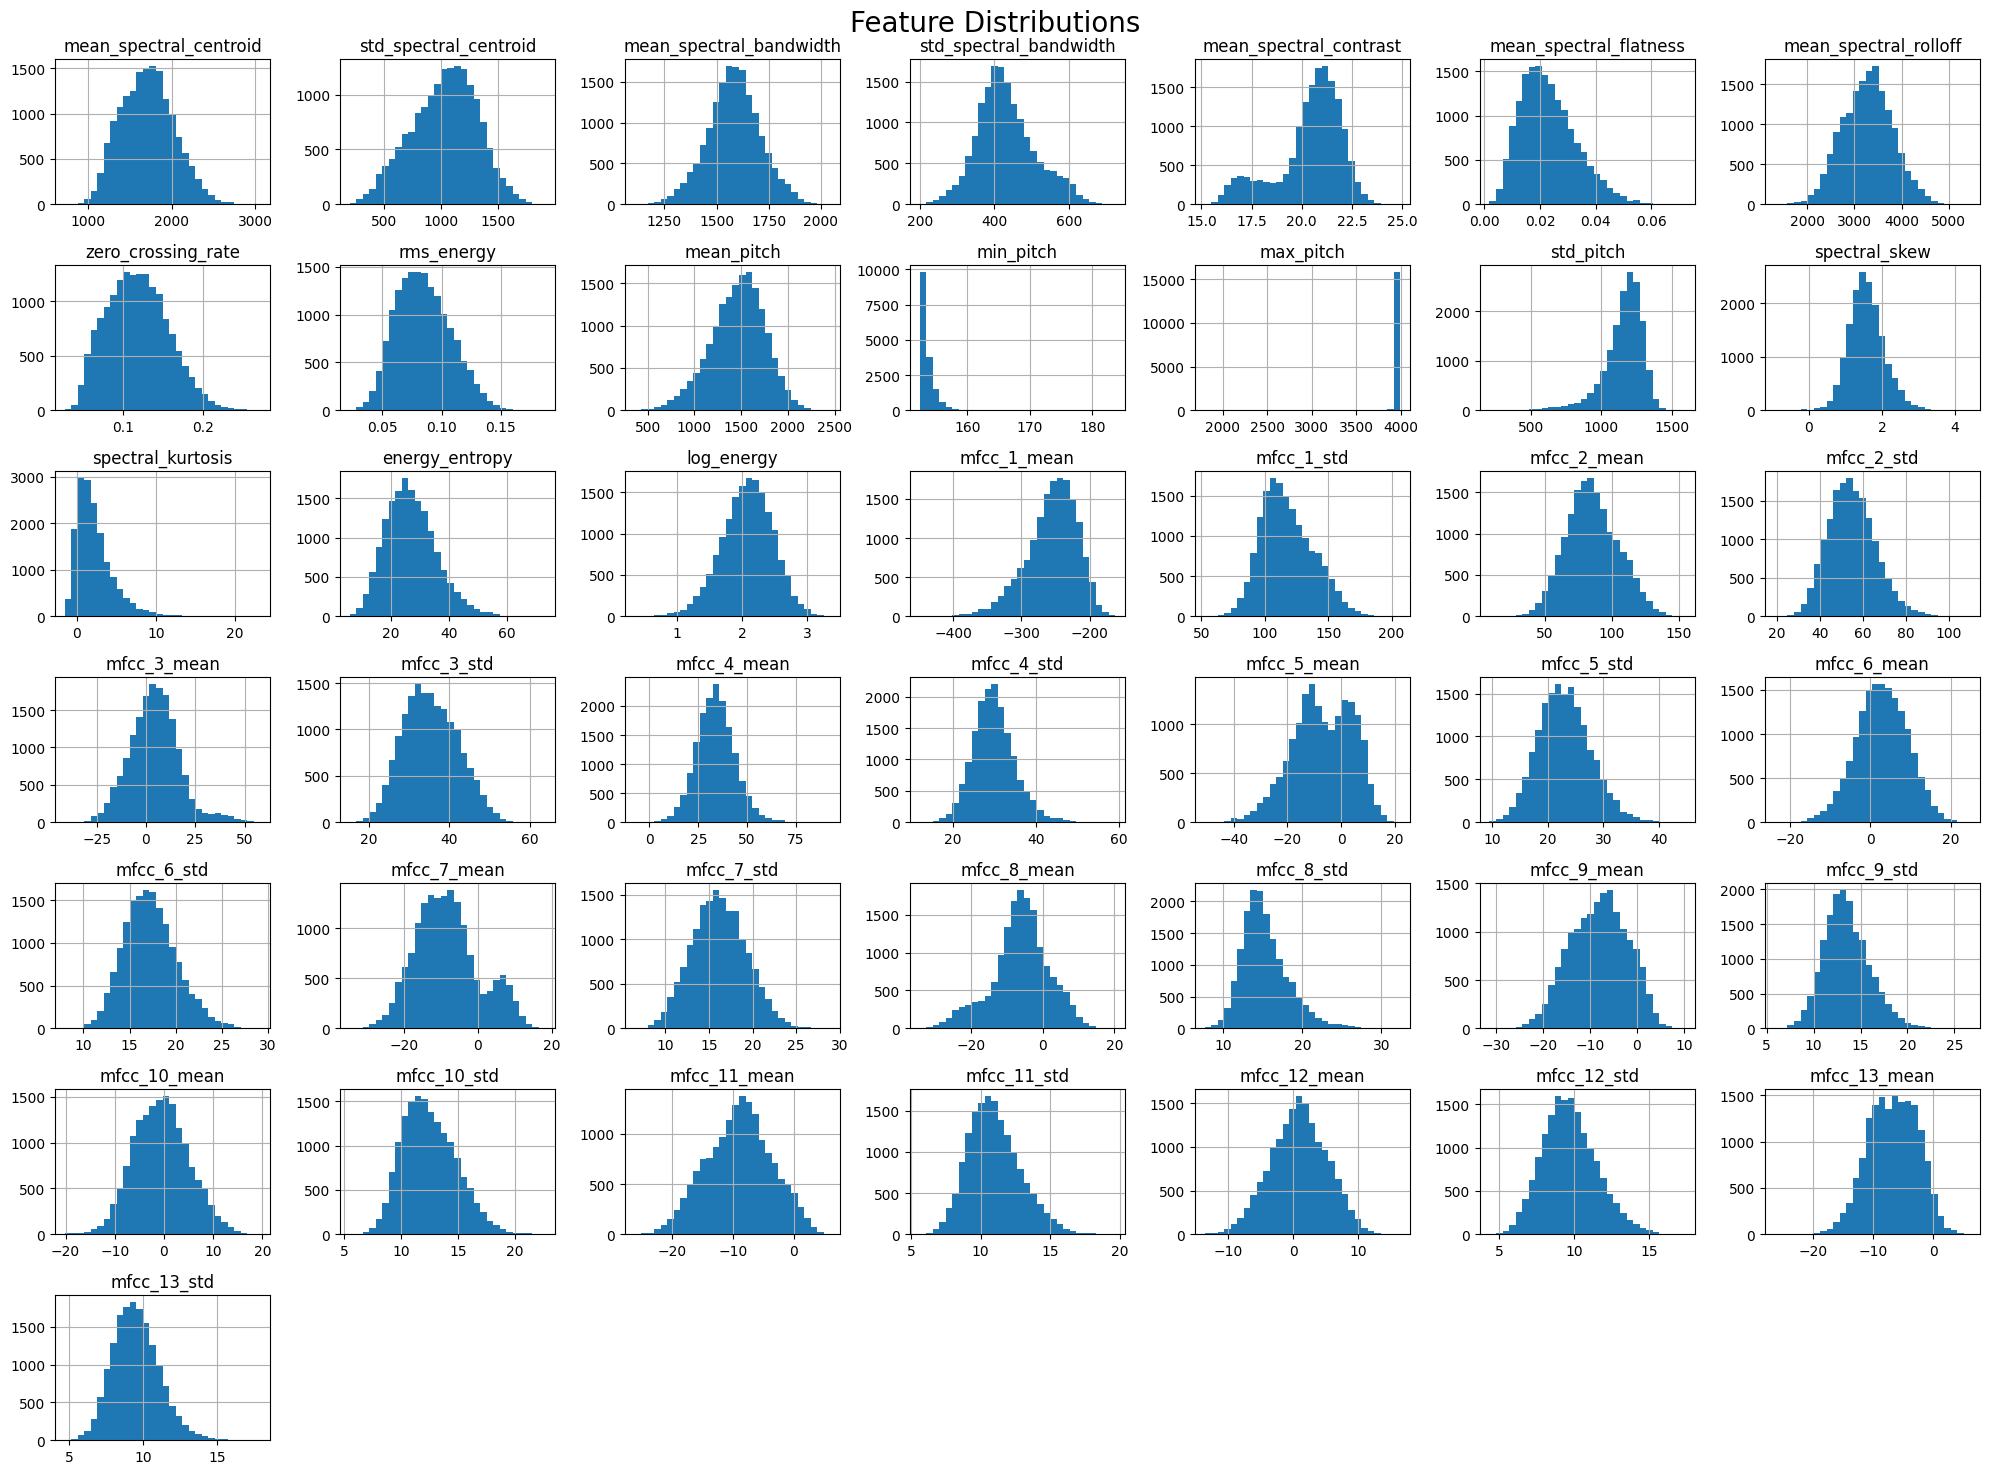

In [5]:
# Histogram

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all features (excluding the label)
df.drop(columns='label').hist(bins=30, figsize=(20, 15))
plt.suptitle("Feature Distributions", fontsize=20)
plt.tight_layout()
plt.show()

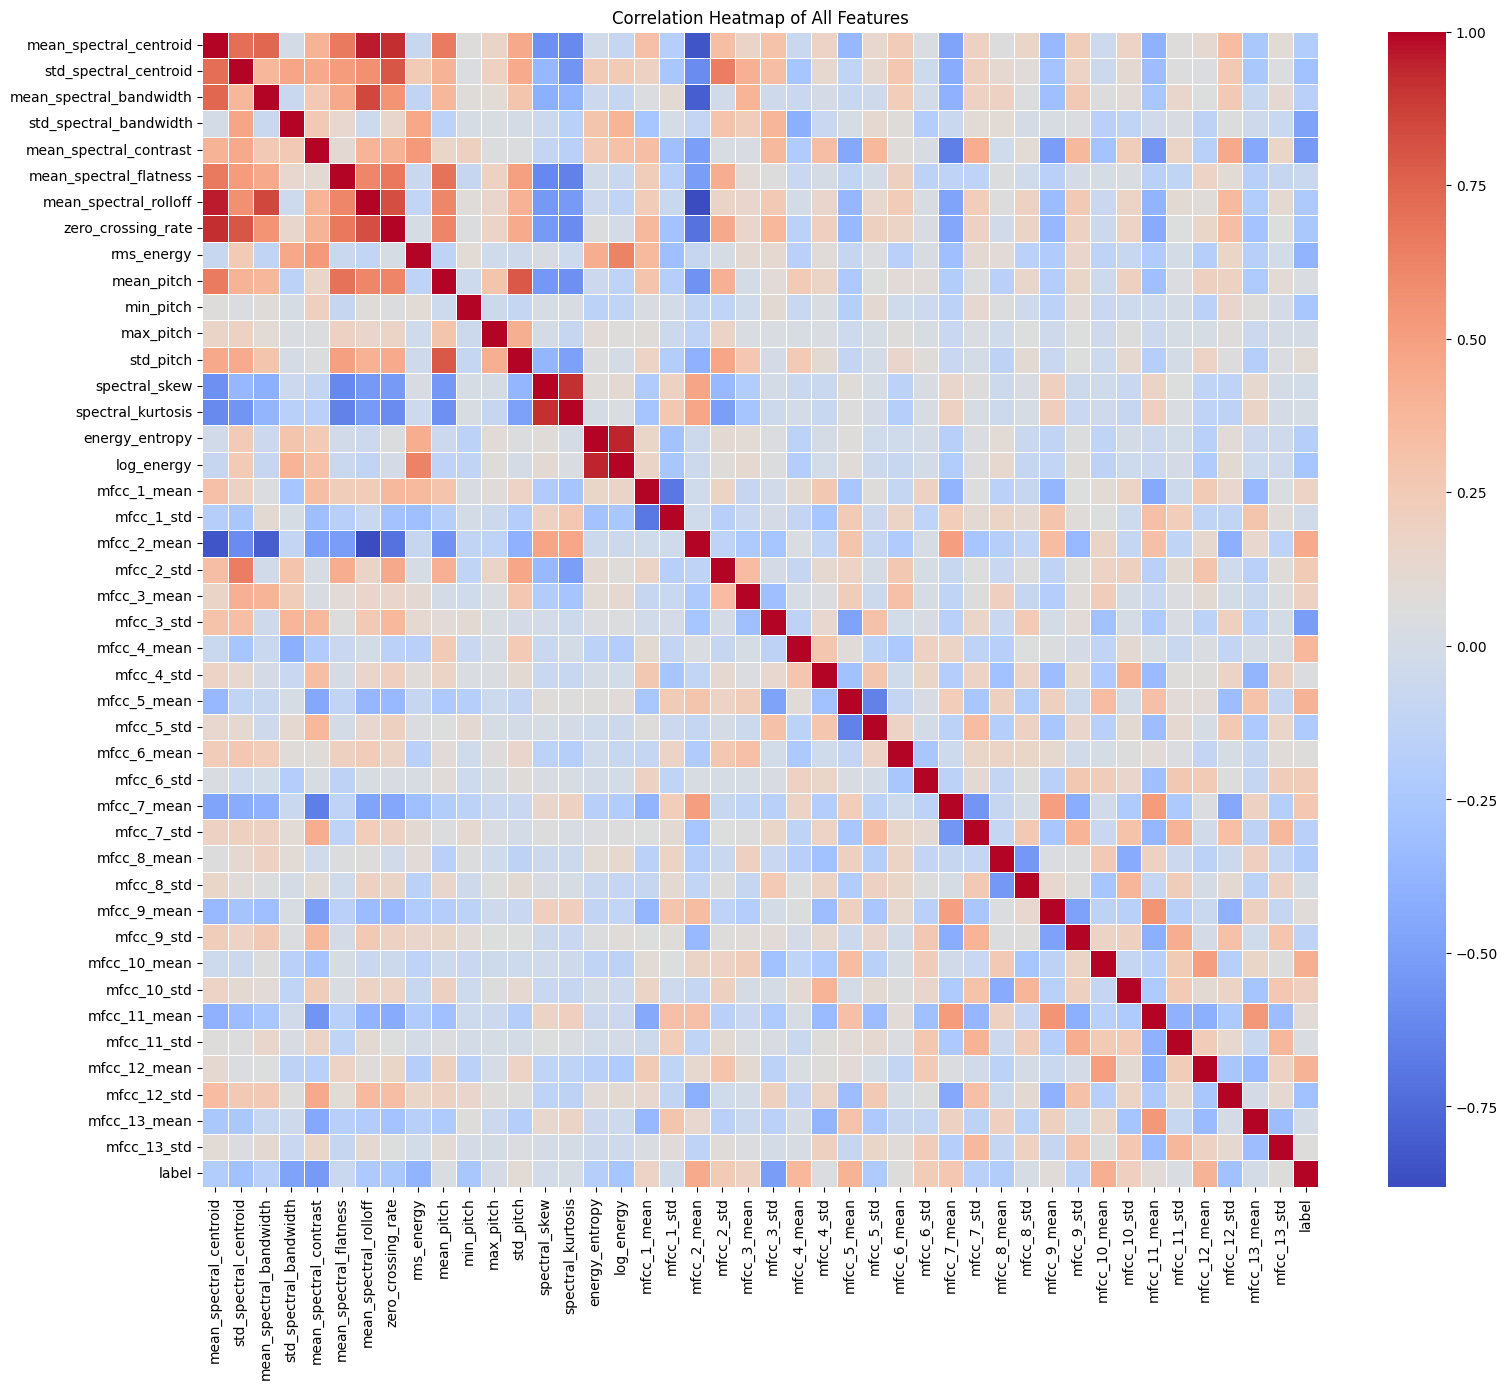

In [6]:
# Correlation Heatmap


plt.figure(figsize=(18, 15))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of All Features")
plt.show()


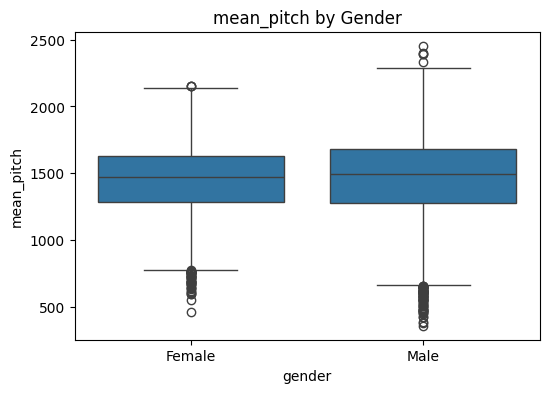

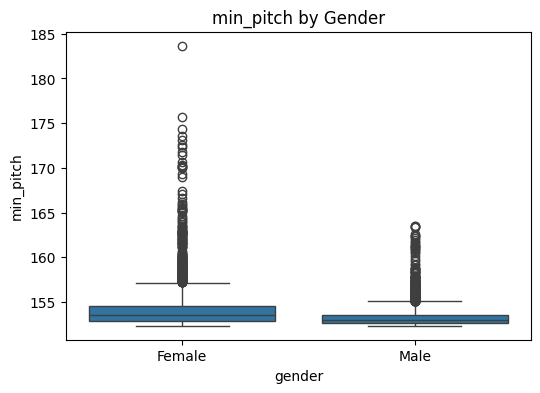

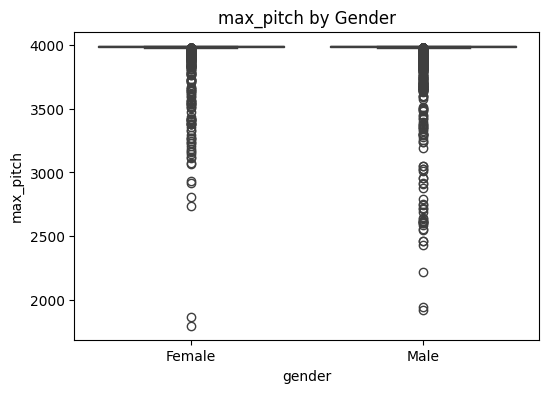

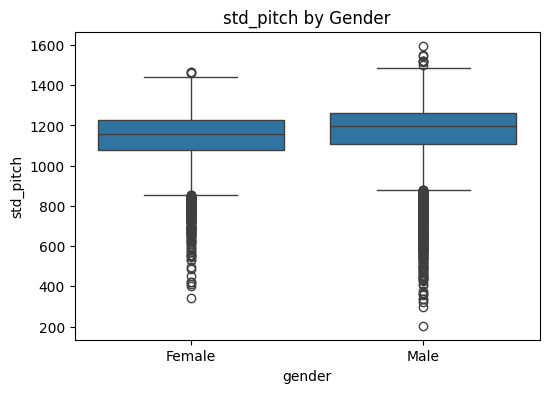

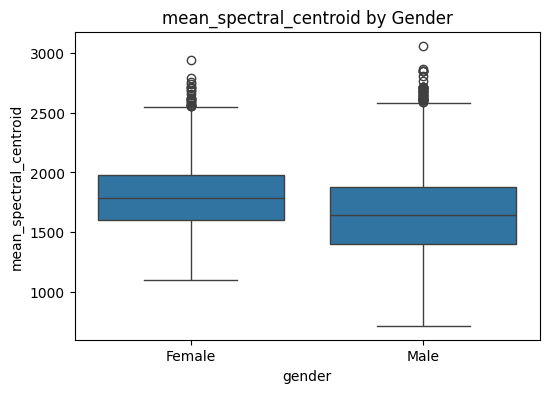

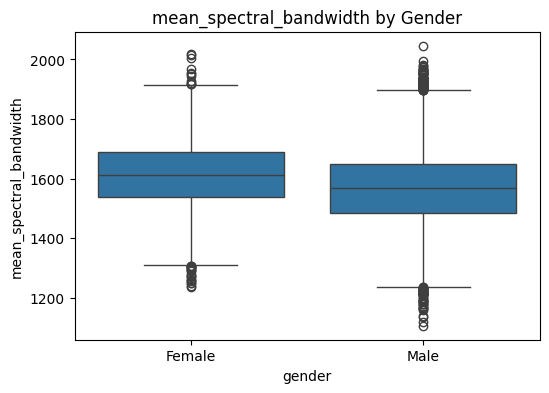

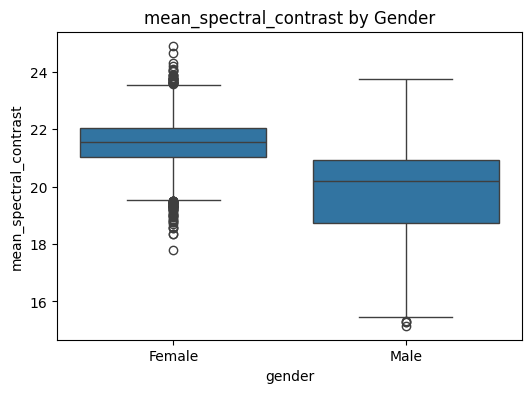

In [7]:
# Boxplot by Gender
# Convert label from 0/1 to category
df['gender'] = df['label'].map({0: 'Female', 1: 'Male'})

# Pitch-related
pitch_features = ['mean_pitch', 'min_pitch', 'max_pitch', 'std_pitch']
spectral_features = ['mean_spectral_centroid', 'mean_spectral_bandwidth', 'mean_spectral_contrast']

# Boxplots
for feature in pitch_features + spectral_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='gender', y=feature, data=df)
    plt.title(f"{feature} by Gender")
    plt.show()

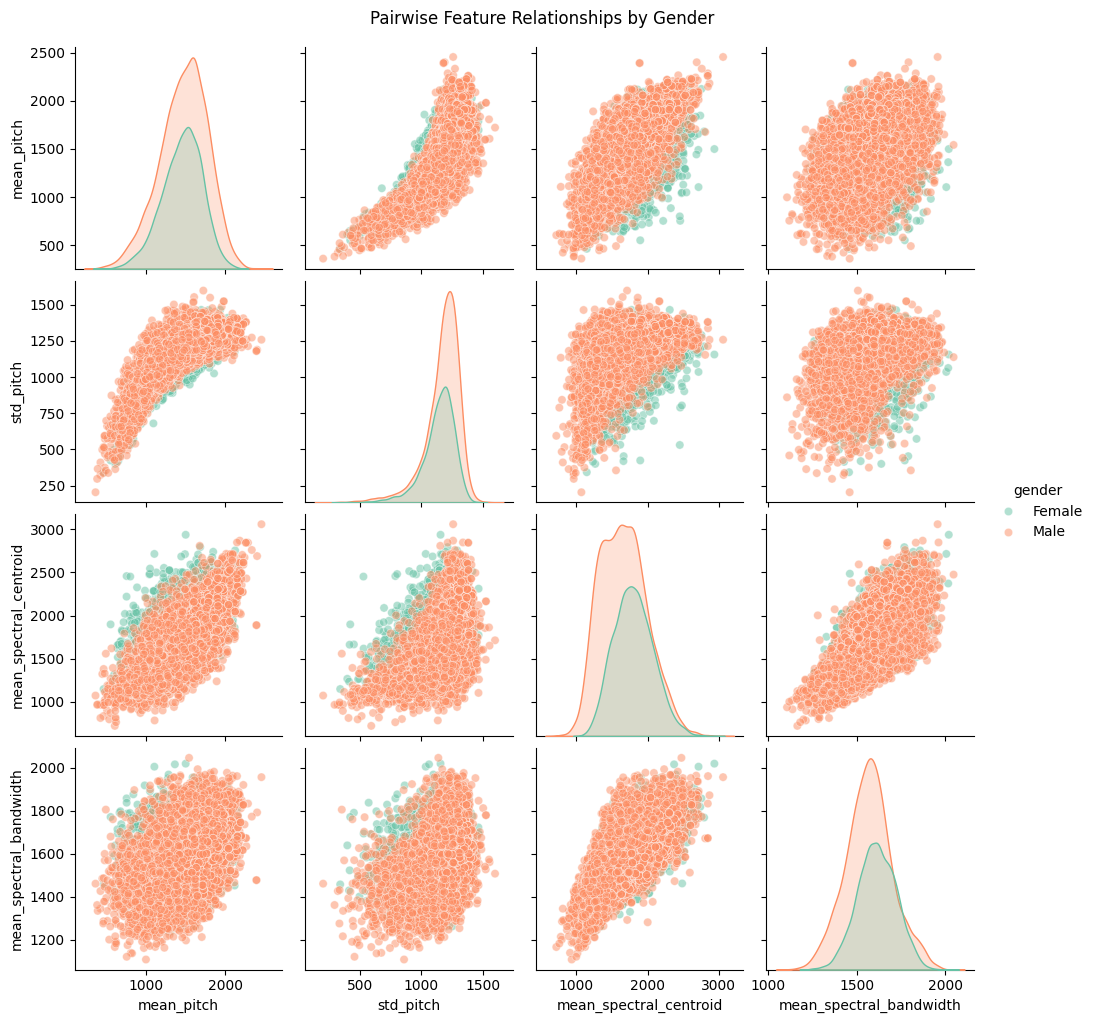

In [8]:
#Pairplot

selected_features = ['mean_pitch', 'std_pitch', 'mean_spectral_centroid', 'mean_spectral_bandwidth', 'gender']
sns.pairplot(df[selected_features], hue='gender', palette='Set2', plot_kws={'alpha': 0.5})
plt.suptitle("Pairwise Feature Relationships by Gender", y=1.02)
plt.show()


## Step 4: Clustering Models

In [9]:
# K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)
print(f"K-Means Silhouette Score: {silhouette_score(X_pca, clusters)}")

# DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)
db_clusters = dbscan.fit_predict(X_pca)
print(f"DBSCAN Silhouette Score: {silhouette_score(X_pca, db_clusters)}")


K-Means Silhouette Score: 0.18349350411359544
DBSCAN Silhouette Score: -0.1672871482382147


## Step 6: Classification Models (Random Forest, SVM, Neural Network)

## Training multiple models for comparison

In [10]:
## Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))


Random Forest Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1163
           1       0.99      1.00      0.99      2067

    accuracy                           0.99      3230
   macro avg       0.99      0.99      0.99      3230
weighted avg       0.99      0.99      0.99      3230



In [11]:
## SVM

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Report")
print(classification_report(y_test, y_pred_svm))


SVM Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      2067

    accuracy                           1.00      3230
   macro avg       1.00      1.00      1.00      3230
weighted avg       1.00      1.00      1.00      3230



In [12]:
## Neural Network

nn = MLPClassifier(random_state=42)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

print("Neural Network Report")
print(classification_report(y_test, y_pred_nn))


Neural Network Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      2067

    accuracy                           1.00      3230
   macro avg       1.00      1.00      1.00      3230
weighted avg       1.00      1.00      1.00      3230



## Step 7: Compare Model Performance

Random Forest Accuracy: 0.993188854489164


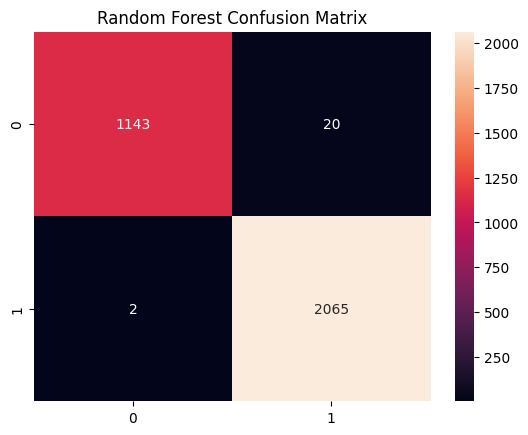

SVM Accuracy: 0.9990712074303405


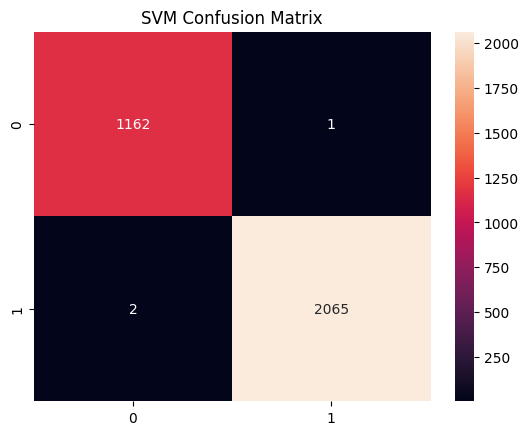

Neural Net Accuracy: 0.9993808049535604


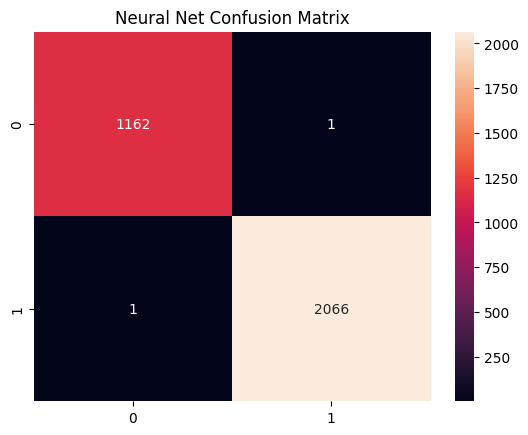

In [13]:
models = {'Random Forest': y_pred_rf, 'SVM': y_pred_svm, 'Neural Net': y_pred_nn}

for name, pred in models.items():
    print(f"{name} Accuracy: {accuracy_score(y_test, pred)}")
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')
    plt.title(f"{name} Confusion Matrix")
    plt.show()


## Model Evaluation Result:  Based on the evaluation results, the best model for classifying human voice samples by gender is the Support Vector Machine (SVM). It achieved perfect performance with 100% accuracy, precision, recall, and F1-score, indicating that it correctly classified all voice samples without any errors. Compared to the Random Forest, which showed a slight drop in recall for the female class, and the Neural Network, which also achieved perfect results but is generally more complex and resource-intensive to train, the SVM offers a highly accurate and efficient solution. Given its robust performance and simplicity, the SVM model is the most reliable and optimal choice for deployment in your Streamlit application.

## Step 8: Saving model and Scaler for Streamlit app

In [14]:
import joblib

joblib.dump(svm, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(pca, "pca.pkl")


['pca.pkl']

In [15]:
from google.colab import files

files.download("best_model.pkl")
files.download("scaler.pkl")
files.download("pca.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>